In [1]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

**CLIMATE CHAGE**

In [6]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

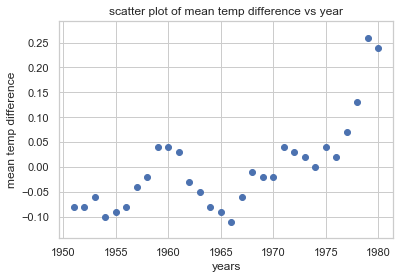

In [9]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

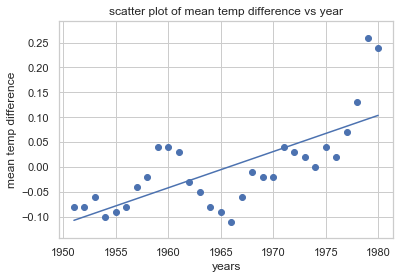

 y = 0.007279199110122247 * x + -14.309265850945273


In [14]:
# Creates a linear regression from the data points
m, b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(f' y = {m} * x + {b}')
plt.show()

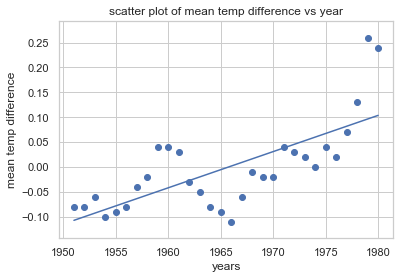

 y = 0.007279199110122357 * x + -14.309265850945492


In [22]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

X_train = yearsBase[:, np.newaxis]
y_train = meanBase
X_test = yearsBase[:, np.newaxis]

# Fit/build the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, predictions)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(f' y = {model.coef_[0]} * x + {model.intercept_}')

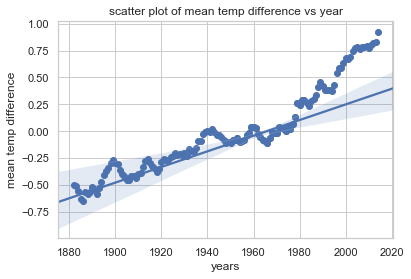

In [23]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()

**ON-TIME FLIGHT ARRIVALS**

In [25]:
df = pd.read_csv('https://topcs.blob.core.windows.net/public/FlightData.csv')

In [27]:
df.isnull().values.any()

True

In [28]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [29]:
df = df.drop('Unnamed: 25', axis=1)

In [30]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]

In [42]:
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15


In [41]:
df['ARR_DEL15'].fillna(1, inplace=True)

Квантование столбца CRS_DEP_TIME

In [44]:
import math

In [48]:
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].apply(lambda x: math.floor(x / 100))

In [50]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [53]:
model = RandomForestClassifier(random_state=13)
model.fit(X_train, y_train)

/Users/popov/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [54]:
predicted = model.predict(X_test)
model.score(X_test, y_test)

0.8602581219403649

In [56]:
probabilities = model.predict_proba(X_test)

*ROC AUC*

In [57]:
roc_auc_score(y_test, probabilities[:, 1])

0.6743824904998539

*Confusion Matrix*

In [62]:
confusion_matrix(y_test, predicted)

array([[1882,   54],
       [ 260,   51]])

*Precision*

In [68]:
train_predictions = model.predict(X_train)
precision_score(y_train, train_predictions)

0.9972375690607734

*Recall*

In [69]:
recall_score(y_train, train_predictions)

0.8650159744408946

Text(0, 0.5, 'True Positive Rate')

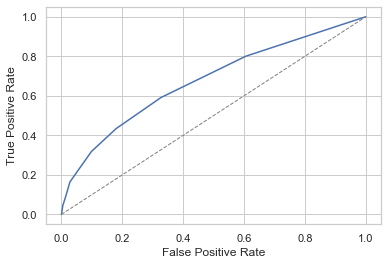

In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [71]:
from datetime import datetime
def predict_delay(departure_date_time, origin, destination):
    
    """Вычисление вероятности того, что рейс прибудет вовремя """
    
    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return f'Error parsing date/time - {e}'

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

In [74]:
predict_delay('2/10/2019 21:45:00', 'JFK', 'ATL')

0.8

In [76]:
predict_delay('2/10/2019 10:00:00', 'ATL', 'SEA')

1.0

(0.0, 1.0)

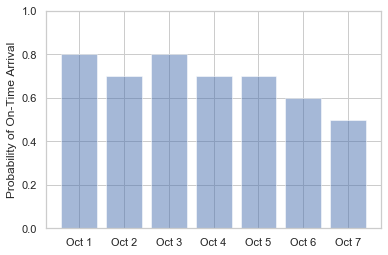

In [77]:
labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

**KERAS AND TENSORFLOW**

In [81]:
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [82]:
from keras.datasets import imdb
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [86]:
word_dict = imdb.get_word_index()
word_dict = {key: value + 3 for key, value in word_dict.items()}
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = {value: key for key, value in word_dict.items()}
print(' '.join(reverse_word_dict[id] for id in X_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [88]:
from keras.preprocessing import sequence
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [91]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [92]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)




Train on 25000 samples, validate on 25000 samples
Epoch 1/5





25000/25000 [==============================] - 35s 1ms/step - loss: 0.5589 - acc: 0.6755 - val_loss: 0.3240 - val_acc: 0.8594
Epoch 2/5
25000/25000 [==============================] - 27s 1ms/step - loss: 0.2085 - acc: 0.9196 - val_loss: 0.2822 - val_acc: 0.8811
Epoch 3/5
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0761 - acc: 0.9776 - val_loss: 0.3520 - val_acc: 0.8736
Epoch 4/5
25000/25000 [==============================] - 28s 1ms/step - loss: 0.0170 - acc: 0.9967 - val_loss: 0.4318 - val_acc: 0.8695
Epoch 5/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.0036 - acc: 0.9996 - val_loss: 0.4876 - val_acc: 0.8694


[]

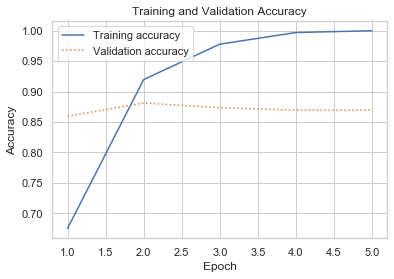

In [93]:
acc = hist.history['acc']
val = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

[]

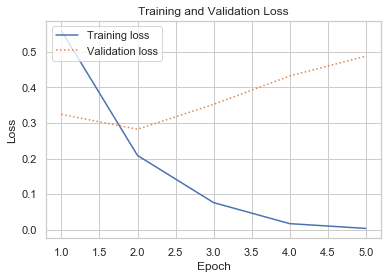

In [94]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.plot()

In [98]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1] * 100:.2f}%")

Accuracy: 86.94%


In [99]:
import string

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [106]:
analyze("This movie is poorly done as to how it tells the story. It is a dark movie showing the problem of mental illness")

0.1804693